# Regressão Logística

## Previsão e Detecção de Risco de Crédito

![title](images/riscos-de-credito.jpeg)

Variável target ou classe:<br />
credit.rating # classificação_crédito <br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [111]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [115]:
atributos_pt = [ 'classificação_crédito',  'conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito',
                 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 
                 'ativos.atual', 'idade', 'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação',
                'dependentes', 'telefone', 'trabalhador_estrangeiro'
]
print(atributos_pt)

['classificação_crédito', 'conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [116]:
pd.set_option('display.max_columns', None)

In [117]:
df = pd.read_csv('credit_dataset_final.csv')
df.columns = atributos_pt
print(df.shape)
df.head()

(1000, 21)


,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,tipo.imóvel,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [118]:
df['crédito.propósito'].value_counts()

crédito.propósito
3    364
4    352
2    181
1    103
Name: count, dtype: int64

In [119]:
df['ocupação'].unique()

array([3, 2, 1, 4])

In [120]:
df['classificação_crédito'].value_counts()

classificação_crédito
1    700
0    300
Name: count, dtype: int64

Variável target ou classe:<br />
credit.rating - classificação de crédito<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [121]:
df.columns[1:]

Index(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento',
       'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade',
       'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação',
       'dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [122]:
len(df.columns[1:])

20

In [123]:
len(df)

1000

## Análise Exploratória

In [124]:
print(atributos_pt)

['classificação_crédito', 'conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [125]:
# variavél target ou classe - class
df['classificação_crédito'].value_counts() # classificação de crédito

classificação_crédito
1    700
0    300
Name: count, dtype: int64

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
classificação_crédito,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
conta.saldo,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
crédito.duração.meses,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
pagamento.crédito.anterior.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
crédito.propósito,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
crédito.valor,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
poupança,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
duração.emprego,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
taxa.parcelamento,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
estado_civil,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


<Axes: xlabel='classificação_crédito', ylabel='crédito.valor'>

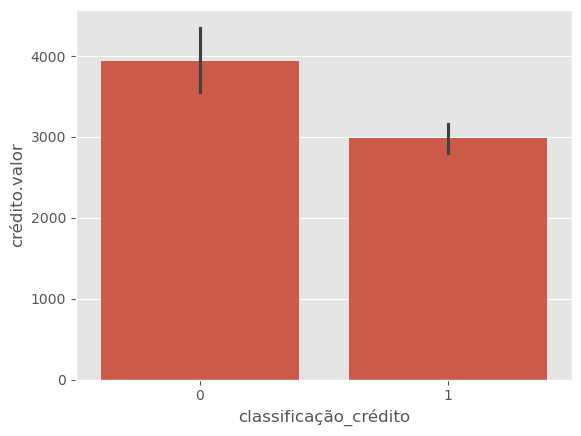

In [127]:
import seaborn as sns
sns.barplot(x='classificação_crédito',y='crédito.valor', data=df)

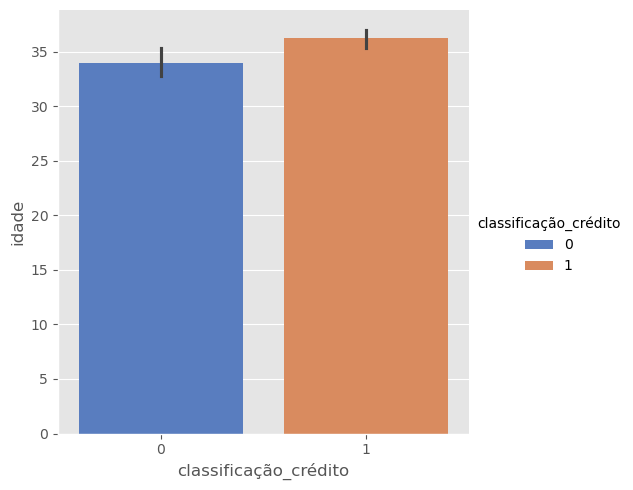

In [128]:
sns.catplot(x='classificação_crédito', y='idade', hue='classificação_crédito', data=df,
                    kind="bar", palette="muted") #size=6,

In [131]:
df.idade.mean(), df.idade.std()

(35.542, 11.352670131696733)

<Axes: xlabel='idade', ylabel='Density'>

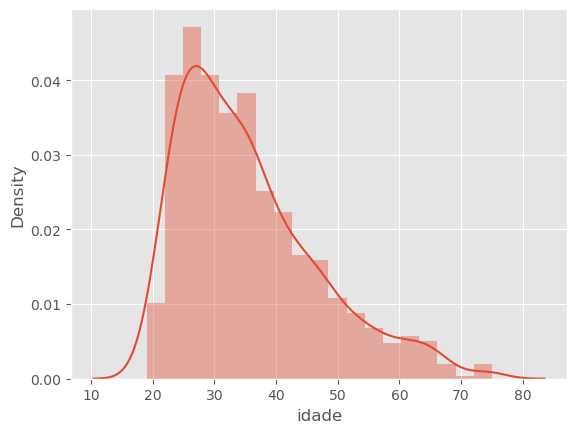

In [130]:
sns.distplot(df.idade)

<Axes: xlabel='crédito.valor', ylabel='Density'>

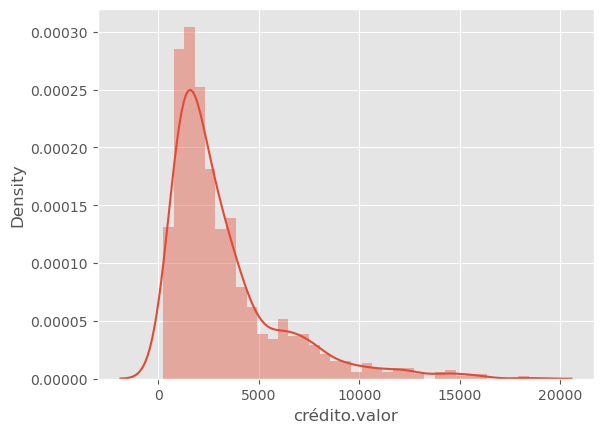

In [132]:
sns.distplot(df['crédito.valor']) # quantidade de crédito

In [134]:
df['crédito.valor'].mean(), df['crédito.valor'].std()

(3271.248, 2822.751759895651)

In [136]:
df['crédito.valor'].describe().T

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: crédito.valor, dtype: float64

# Correlação

In [137]:
#df2 = df[df.columns[:14] ]
df2 = df.copy()
corr = df2.corr()
corr

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,tipo.imóvel,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
classificação_crédito,1.000000,0.339409,-0.214927,0.220233,-0.106696,-0.154740,0.179191,0.118092,-0.072404,0.091249,-0.000751,-0.002967,-0.142612,0.091272,0.113285,0.018119,0.045727,-0.032735,0.003015,0.036466,0.082079
conta.saldo,0.339409,1.000000,-0.071254,0.180614,-0.009361,-0.041161,0.228340,0.081681,-0.022551,0.034715,-0.119636,-0.064727,-0.030244,0.052530,0.049352,0.029771,0.074127,0.030366,-0.027676,0.063609,-0.036607
crédito.duração.meses,-0.214927,-0.071254,1.000000,-0.041958,-0.059048,0.624988,0.048550,0.061587,0.074749,0.045124,-0.009993,0.034067,0.303971,-0.037550,-0.077411,0.153126,0.011292,0.210910,-0.023834,0.164718,-0.134680
pagamento.crédito.anterior.status,0.220233,0.180614,-0.041958,1.000000,-0.017890,-0.027384,0.023986,0.138263,0.030111,0.071611,-0.056376,0.045684,-0.051508,0.129399,0.179456,0.057877,0.461048,0.029693,0.007751,0.059245,0.018756
crédito.propósito,-0.106696,-0.009361,-0.059048,-0.017890,1.000000,-0.115828,-0.034783,-0.002226,0.057127,0.043448,0.022169,-0.064780,-0.101466,0.054790,-0.059549,0.016472,0.070146,-0.150255,0.046717,-0.041661,0.067047
crédito.valor,-0.154740,-0.041161,0.624988,-0.027384,-0.115828,1.000000,0.060829,0.009649,-0.271322,0.029854,0.004118,0.028917,0.311602,0.032273,-0.081724,0.133024,0.027446,0.285393,0.017144,0.277000,-0.030662
poupança,0.179191,0.228340,0.048550,0.023986,-0.034783,0.060829,1.000000,0.129549,0.016900,0.031260,-0.104462,0.095107,0.028765,0.080127,0.001212,0.004620,-0.025604,0.008837,0.026641,0.085042,0.007363
duração.emprego,0.118092,0.081681,0.061587,0.138263,-0.002226,0.009649,0.129549,1.000000,0.127099,0.166372,-0.020185,0.275736,0.115811,0.307389,0.009201,0.143640,0.139536,0.118875,0.097196,0.084495,-0.031172
taxa.parcelamento,-0.072404,-0.022551,0.074749,0.030111,0.057127,-0.271322,0.016900,0.127099,1.000000,0.116588,-0.013823,0.049302,0.053391,0.057271,0.002248,0.091229,0.027664,0.097755,-0.071207,0.014413,-0.094762
estado_civil,0.091249,0.034715,0.045124,0.071611,0.043448,0.029854,0.031260,0.166372,0.116588,1.000000,0.036814,-0.024086,0.017707,0.073569,-0.035680,0.160620,0.076789,0.022549,0.169273,0.051038,0.080643


<Axes: >

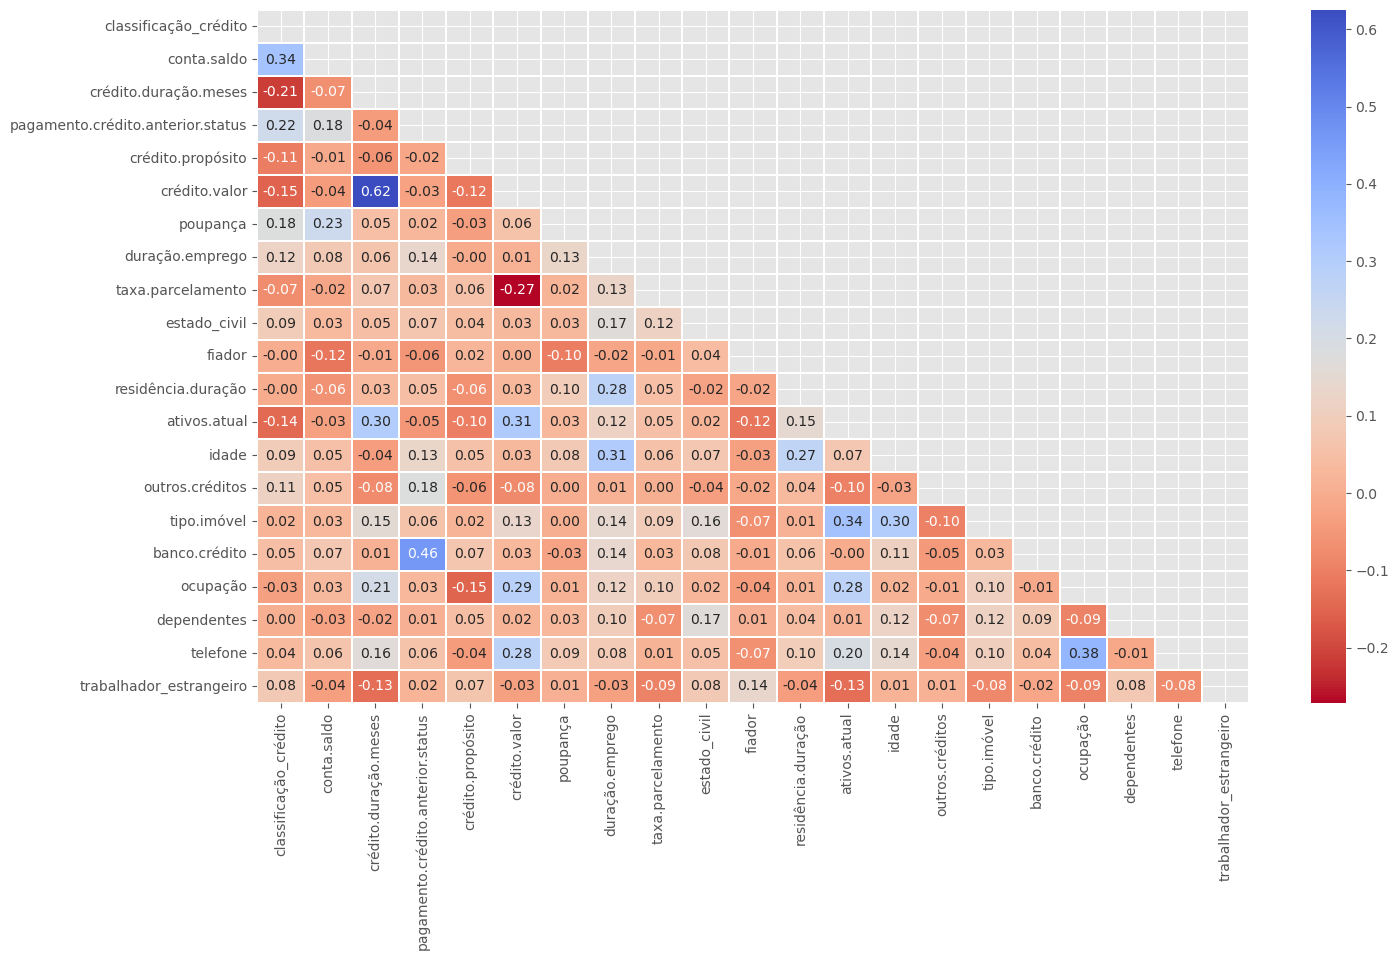

In [138]:
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 9))
sns.heatmap(
    corr,
    cmap='coolwarm_r',
    mask=mask,
    # cmap=cmap,
    # center=0,
    # vmin=-1,
    # vmax=1,
    #square=True,
    linewidths=0.01,
    annot=True,
    fmt = '.2f', 
    xticklabels=df.columns[:],
    yticklabels=df.columns[:],
)

# Atributos mais importantes

In [139]:
df.columns[1:]

Index(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento',
       'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade',
       'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação',
       'dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [140]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

np.set_printoptions(suppress=True)

X = df[ list(df.columns[1:]) ]
selector = VarianceThreshold()
selector.fit_transform(X)
selector.variances_

array([    0.6975,    68.    ,     0.3847,     0.9438, 18174.    ,
           1.4301,     1.2211,     1.2503,     1.1376,     0.0844,
           1.217 ,     1.1018,    56.    ,     0.1514,     0.2808,
           0.2323,     0.4268,     0.131 ,     0.2408,     0.0356])

In [141]:
dfatributos = pd.DataFrame( {'Atributo': df.columns[1:],
                              'Importancia': selector.variances_  })
                             
dfatributos = dfatributos.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
dfatributos

,Atributo,Importancia
0,crédito.valor,18174.000000
1,crédito.duração.meses,68.000000
2,idade,56.000000
3,poupança,1.430124
4,taxa.parcelamento,1.250271
5,duração.emprego,1.221084
6,residência.duração,1.216975
7,estado_civil,1.137616
8,ativos.atual,1.101836
9,crédito.propósito,0.943775


## Definindo X e Y

In [142]:
df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,tipo.imóvel,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [143]:
atributos = list(df.columns[1:])
print(atributos)

['conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [144]:
X = df[ atributos ]
X.head()

,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,tipo.imóvel,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [145]:
X = X.values.astype(float)
y = df['classificação_crédito'].values

In [146]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [147]:
X[:3]

array([[   1.,   18.,    3.,    2., 1049.,    1.,    1.,    4.,    1.,
           1.,    4.,    2.,   21.,    2.,    1.,    1.,    3.,    1.,
           1.,    1.],
       [   1.,    9.,    3.,    4., 2799.,    1.,    2.,    2.,    3.,
           1.,    2.,    1.,   36.,    2.,    1.,    2.,    3.,    2.,
           1.,    1.],
       [   2.,   12.,    2.,    4.,  841.,    2.,    3.,    2.,    1.,
           1.,    4.,    1.,   23.,    2.,    1.,    1.,    2.,    1.,
           1.,    1.]])

In [148]:
y[:3]

array([1, 1, 1])

## Preparando os dados para aplicar Regressão Logistica<br />

In [149]:
X.shape

(1000, 20)

## Aplicando o Algoritmo

In [150]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y) # Treinamento
model

LogisticRegression()

## Avaliando A Acurácia do Modelo

In [151]:
# check the accuracy on the training set
model.score(X, y) * 100

77.3

### Examinando os Coeficientes

In [152]:
cols = df.columns.values
cols

array(['classificação_crédito', 'conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego',
       'taxa.parcelamento', 'estado_civil', 'fiador',
       'residência.duração', 'ativos.atual', 'idade', 'outros.créditos',
       'tipo.imóvel', 'banco.crédito', 'ocupação', 'dependentes',
       'telefone', 'trabalhador_estrangeiro'], dtype=object)

In [153]:
cols_atributos = cols[1:]
cols_atributos

array(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego',
       'taxa.parcelamento', 'estado_civil', 'fiador',
       'residência.duração', 'ativos.atual', 'idade', 'outros.créditos',
       'tipo.imóvel', 'banco.crédito', 'ocupação', 'dependentes',
       'telefone', 'trabalhador_estrangeiro'], dtype=object)

In [154]:
len(cols_atributos)

20

In [155]:
model.intercept_[0]

-0.015971043308847306

In [156]:
model.coef_[0]

array([ 0.7672, -0.0254,  0.4352, -0.4434, -0.0001,  0.2721,  0.186 ,
       -0.2975,  0.2036,  0.03  , -0.0694, -0.2508,  0.0079,  0.15  ,
        0.0874, -0.0009, -0.0146, -0.0638,  0.129 ,  0.0536])

In [157]:
len(model.coef_[0])

20

In [158]:
# examine the coefficients
elementos = [[x,y] for x, y in zip(cols_atributos, model.coef_[0])]
elementos

[['conta.saldo', 0.7671513290886726],
 ['crédito.duração.meses', -0.025370945640840824],
 ['pagamento.crédito.anterior.status', 0.43524767446862406],
 ['crédito.propósito', -0.4433816631133629],
 ['crédito.valor', -0.00010201735971082946],
 ['poupança', 0.2720537024952242],
 ['duração.emprego', 0.18602348738743804],
 ['taxa.parcelamento', -0.2975008524426028],
 ['estado_civil', 0.20357069457308333],
 ['fiador', 0.030022871028895733],
 ['residência.duração', -0.06938041833183217],
 ['ativos.atual', -0.2507882294626185],
 ['idade', 0.00788447897800523],
 ['outros.créditos', 0.15000611904763442],
 ['tipo.imóvel', 0.0873852995711594],
 ['banco.crédito', -0.000914462062827923],
 ['ocupação', -0.014621802469460878],
 ['dependentes', -0.0637659902501404],
 ['telefone', 0.12903903795231358],
 ['trabalhador_estrangeiro', 0.05360891663469353]]

In [159]:
# examine the coefficients
pd.DataFrame(elementos, columns=['Atributo', 'w'])

,Atributo,w
0,conta.saldo,0.767151
1,crédito.duração.meses,-0.025371
2,pagamento.crédito.anterior.status,0.435248
3,crédito.propósito,-0.443382
4,crédito.valor,-0.000102
5,poupança,0.272054
6,duração.emprego,0.186023
7,taxa.parcelamento,-0.297501
8,estado_civil,0.203571
9,fiador,0.030023


In [160]:
model.intercept_[0]

-0.015971043308847306

# Previsão

In [161]:
df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,tipo.imóvel,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [162]:
atributos = list(df.columns[1:])
print(atributos)

['conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [163]:
valores = df.iloc[1, 1:].values
valores

array([   1,    9,    3,    4, 2799,    1,    2,    2,    3,    1,    2,
          1,   36,    2,    1,    2,    3,    2,    1,    1])

In [165]:
model.predict(valores.reshape(1, -1))[0], model.predict_proba(valores.reshape(1, -1))[0]

(1, array([0.3207, 0.6793]))

# Testando p(x)

In [166]:
%%latex
$ p(x) = \Large  \frac{1}{1+e^ - (\beta0 + \beta1 . x) }  $

<IPython.core.display.Latex object>

hx = (bo + b1.x1 + .... bn.xn)

In [167]:
list(valores)

[1, 9, 3, 4, 2799, 1, 2, 2, 3, 1, 2, 1, 36, 2, 1, 2, 3, 2, 1, 1]

In [168]:
model.coef_[0]

array([ 0.7672, -0.0254,  0.4352, -0.4434, -0.0001,  0.2721,  0.186 ,
       -0.2975,  0.2036,  0.03  , -0.0694, -0.2508,  0.0079,  0.15  ,
        0.0874, -0.0009, -0.0146, -0.0638,  0.129 ,  0.0536])

In [169]:
h_x = 0
for coef, var in zip(model.coef_[0], list(valores)):
    termo = coef * var
    #print(coef, eval(var))
    h_x += termo

h_x += model.intercept_[0]
print(h_x)

0.7504568405681287


In [170]:
import numpy as np

p_x = 1 / (1 + np.e ** - h_x)
print('Probabilidade de Sucesso (classe 1): ', p_x) # Probabilidade de Sucesso
print('Probabilidade  (classe 0): ', 1 - p_x)

Probabilidade de Sucesso (classe 1):  0.6792782342988476
Probabilidade  (classe 0):  0.3207217657011524


## Avaliando o modelo usando split de dados

In [171]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train), len(X_test))

700 300


In [172]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2

LogisticRegression()

In [173]:
# predict class labels for the test set
y_predicted = model2.predict(X_test)
print (y_predicted[:5])

[1 0 1 1 0]


In [174]:
# generate evaluation metrics
print ('Acurácia: ', metrics.accuracy_score(y_test, y_predicted) * 100)

Acurácia:  73.0


In [175]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:5])

[[0.2794 0.7206]
 [0.5128 0.4872]
 [0.1136 0.8864]
 [0.0981 0.9019]
 [0.5026 0.4974]]


In [176]:
probs[: , 0][:4]

array([0.2794, 0.5128, 0.1136, 0.0981])

In [177]:
print('Valores Previstos e suas Probalidades das classes')
df3 = pd.DataFrame( {
                    'Classe': y_predicted,
                   'Prob_classe_0': probs[:, 0],
                   'Prob_classe_1': probs[:, 1] 
                   })
df3.head(10)

Valores Previstos e suas Probalidades das classes


,Classe,Prob_classe_0,Prob_classe_1
0,1,0.279404,0.720596
1,0,0.512786,0.487214
2,1,0.113578,0.886422
3,1,0.098067,0.901933
4,0,0.502615,0.497385
5,0,0.574995,0.425005
6,1,0.067826,0.932174
7,1,0.140570,0.859430
8,1,0.107401,0.892599
9,1,0.081193,0.918807


## Avaliando o modelo usando Cross-validation

In [178]:
from sklearn import model_selection
num_folds = 10
num_instances = len(X)
seed = 7

modelo = LogisticRegression()

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, shuffle=False) #, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, 
                                            scoring='accuracy')

# Print do resultado
print(resultado)
print("Accuracy: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

[0.9  0.91 0.87 0.86 0.86 0.84 0.7  0.6  0.26 0.31]
Accuracy: 0.711 (0.232)


## Realizando Previsões

In [179]:
df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,tipo.imóvel,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [180]:
df.loc[2,:].values

array([  1,   2,  12,   2,   4, 841,   2,   3,   2,   1,   1,   4,   1,
        23,   2,   1,   1,   2,   1,   1,   1])

In [181]:
df['conta.saldo'].value_counts()

conta.saldo
3    457
1    274
2    269
Name: count, dtype: int64

In [182]:
df.poupança.value_counts()

poupança
1    603
4    183
3    111
2    103
Name: count, dtype: int64

In [183]:
df.columns[1:]

Index(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento',
       'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade',
       'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação',
       'dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [240]:
Xprev1 = np.array(
    [      1,   12,    3,    2, 2049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1] )

Xprev1

array([   1,   12,    3,    2, 2049,    1,    1,    4,    1,    1,    4,
          2,   21,    2,    1,    1,    3,    1,    1,    1])

In [241]:
Xprev1 = Xprev1.reshape(1, -1)
Xprev1

array([[   1,   12,    3,    2, 2049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1]])

In [242]:
model.predict(Xprev1)[0]

1

In [243]:
model.predict_proba(Xprev1)[0]

array([0.4984, 0.5016])

In [245]:
df.columns[1:]

Index(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento',
       'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade',
       'outros.créditos', 'tipo.imóvel', 'banco.crédito', 'ocupação',
       'dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [254]:
Xprev4 = df.loc[100,:].values
Xprev4 = Xprev4[1:]
Xprev4 

array([   3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,    4,
          1,   40,    2,    2,    1,    3,    1,    2,    1])

In [257]:
model.predict(Xprev4.reshape(1, -1))[0]

1

In [258]:
model.predict_proba(Xprev4.reshape(1, -1))

array([[0.0566, 0.9434]])

In [ ]:
Xprev2 = np.array([ 3,   18,    1,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])
Xprev2

In [ ]:
Xprev2 = Xprev2.reshape(1, -1)
Xprev2

In [ ]:
model.predict(Xprev2)[0]

In [ ]:
model.predict_proba(Xprev2)

In [ ]:
df.loc[5,:].values

In [ ]:
Xprev = np.array([1,   10,    1,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])
Xprev

In [ ]:
Xprev = Xprev.reshape(1, -1)
Xprev

In [ ]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev)[0]

In [ ]:
model.predict_proba(Xprev)

In [ ]:
df.loc[950,:].values

In [ ]:
Xprev3 = np.array([2,   14,    3,    3, 12146,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])
Xprev3

In [ ]:
Xprev3 = Xprev3.reshape(1, -1)
Xprev3

In [ ]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev3)

In [ ]:
model.predict_proba(Xprev3)

# Métricas para Algorítmos de Classificação

### carregando o dataset

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
# df = pd.read_csv('credit_dataset_final.csv')
print(len(df))
df.head()

In [ ]:
X = df.iloc[:,1:].values.astype(float)
y = Y =  df.iloc[:,0]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds) #, True, random_state = seed)

# Criando o modelo

solver = 'newton-cg'
solver = 'lbfgs'
modelo = LogisticRegression(max_iter=200, solver=solver)
# max_iter = iterações realizadas para os otimizadores convergirem.
# Solver = Otimizador

{ 'max_iter': [100, 200, 300, 400],
  'solve': ['newton-cg', 'sag']
}

df.head()

## Acurácia
Número de previsões corretas. <br />
É útil apenas quando existe o mesmo número de observações em cada classe.

In [ ]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

## Confusion Matrix
Permite verificar a acurácia de um modelo com duas ou mais classes

In [ ]:
from IPython.display import Image
print("Matriz de Confusão")
Image("confusion_matrix.png")

In [ ]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)


#matrix = confusion_matrix(Y_teste, model.predict(X_teste))

# Imprimindo a Confusion Matrix
print(matrix)

In [ ]:
len(X_treino), len(Y_teste)

In [ ]:
Y_teste.shape, Y_treino.shape

## Curva ROC 

![image](images/auc.png)

### Curva ROC 
A Curva ROC permite analisar a métrica AUC (Area Under the Curve).<br />
Essa é uma métrica de performance para classificação binária, em que podemos definir as classes 
em positivas e negativas. <br />
Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity. <br />
Sensitivity é a taxa de verdadeiros positivos (TP). Esse é o número de instâncias positivas da primeira classe 
que foram previstas corretamente. <br />
Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram 
previstas corretamente.<br />
Valores acima de 0.5 indicam uma boa taxa de previsão.

In [ ]:
# Definindo os valores para o número de folds
num_folds = 3
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds) 
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print(resultado)
print("AUC: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

In [ ]:
from sklearn import metrics

modelo = LogisticRegression()
modelo.fit(X,y)
# calculate the fpr and tpr for all thresholds of the classification
probs = modelo.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title('Curva ROC - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logarithmic Loss

![image](images/logloss.png)

Onde: <br> 
$ y_i = valor \space observado $ <br>
$ p_i = probabilidade \space prevista $

![image](images/logloss02.png)

![image](images/logloss03.png)

## Logarithmic Loss
Avalia as previsões de probabilidade de um membro pertencer a uma determinada classe.<br />
Valores menores indicam boa performance, com 0 representando um perfeito logloss.<br /> 
A função cross_val_score() inverte o valor.

In [ ]:
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'neg_log_loss')

# Print do resultado
print("Logloss: %.3f (%.3f)" % (resultado.mean(), resultado.std()))
print(resultado)

## Relatório de Classificação

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas? <br />
$\text{Precision} = \frac{TP}{TP+FP}$
<br /><br />
Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?<br />
$\text{Recall} = \frac{TP}{TP+FN}$
<br /><br />
f1-score: f1-score combina as métricas de precision e recall<br /><br />
$\text{f1-score} = \frac{2 * (precision * recall)}{(precision + recall)}$
<br /><br />
O f1-score pode ser interpretado com a média ponderada entre precision e recall,<br />
onde o f1-score encontra seu melhor valor ao atingir 1, e seu pior valor ao atingir 0<br /><br />
Support: Número de instâncias

## Relatório de Classificação

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)
print(report)
# Imprimindo o relatório
#Image("confusion_matrix.png", width=250, height=250)

$\text{Precision} = \frac{TP}{TP+FP}$  $ | \text{Recall} = \frac{TP}{TP+FN}$

In [ ]:
print(report);print('matriz de confusão:\n', matrix) 

Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas?

----

# Selecao de Atributos

In [ ]:
df.head()

In [ ]:
y = df['classificação_crédito'].values
X = df.drop('classificação_crédito', axis=1).to_numpy()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier


num_atributos_relevantes = 17
estimator = modelo = GradientBoostingClassifier()
selector = RFE(estimator, n_features_to_select=num_atributos_relevantes, step=1)
selector = selector.fit(X, y)

print("Num Features: ", selector.n_features_)

atributos = list(df.columns) 
atributos.remove('classificação_crédito')

print(atributos)
print("Selected Features: ", selector.support_)
print("Feature Ranking: ", selector.ranking_)

In [ ]:
dfranking = pd.DataFrame({ 'atributos': atributos, 
                         'ranking' : selector.ranking_, 
                          }) 

dfranking = dfranking.sort_values(by='ranking')
dfranking

In [ ]:
df['conta.saldo'].unique()

In [ ]:
atributos_selecionados = dfranking[ (dfranking.ranking == 1) ].atributos
atributos_selecionados = list(atributos_selecionados)
atributos_selecionados

In [ ]:
df[atributos_selecionados].head()

In [ ]:
y = df['classificação_crédito'].values
X = df[atributos_selecionados].to_numpy()

In [ ]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

In [ ]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)


#matrix = confusion_matrix(Y_teste, model.predict(X_teste))

# Imprimindo a Confusion Matrix
print(matrix)

In [ ]:
# Matriz de confusao com os todos os atributos20
# [[ 46  59]
#  [ 15 210]]

In [ ]:
df1 = dfranking[ dfranking.ranking == 1 ]
df1

In [ ]:
atributos_ranking = list(df1.atributos.values)
atributos_ranking

In [ ]:
df.head()